<a href="https://colab.research.google.com/github/ramya0105/calculatorjava/blob/main/SCT_ML_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install -q kaggle

In [6]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"krsree","key":"c06c0635c69aae9390e21a22822c3e65"}'}

In [7]:
! mkdir ~/.kaggle

In [8]:
! cp kaggle.json ~/.kaggle/

In [10]:
! chmod 600 ~/.kaggle/kaggle.json

In [11]:
! kaggle datasets list

ref                                                           title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
haseebindata/student-performance-predictions                  Student Performance Predictions                    9KB  2024-08-17 06:57:57           2439         59  0.9411765        
berkayalan/paris-2024-olympics-medals                         Paris 2024 Olympics Medals                         1KB  2024-08-14 11:02:45           2897         54  1.0              
sudhanvahg/30-indian-cities-information-technology-dataset    30 Indian Cities Information Technology dataset    9KB  2024-08-21 10:36:56            717         21  0.88235295       
balajivaraprasad/crimes-against-women-in-india-2001-2021      Crimes Against Women in

In [18]:
!kaggle competitions download -c dogs-vs-cats

 99% 808M/812M [00:11<00:00, 113MB/s]
100% 812M/812M [00:11<00:00, 74.0MB/s]


In [19]:
! unzip dogs-vs-cats.zip

Archive:  dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [20]:
! unzip test1.zip

Streaming output truncated to the last 5000 lines.
  inflating: test1/5499.jpg          
  inflating: test1/55.jpg            
  inflating: test1/550.jpg           
  inflating: test1/5500.jpg          
  inflating: test1/5501.jpg          
  inflating: test1/5502.jpg          
  inflating: test1/5503.jpg          
  inflating: test1/5504.jpg          
  inflating: test1/5505.jpg          
  inflating: test1/5506.jpg          
  inflating: test1/5507.jpg          
  inflating: test1/5508.jpg          
  inflating: test1/5509.jpg          
  inflating: test1/551.jpg           
  inflating: test1/5510.jpg          
  inflating: test1/5511.jpg          
  inflating: test1/5512.jpg          
  inflating: test1/5513.jpg          
  inflating: test1/5514.jpg          
  inflating: test1/5515.jpg          
  inflating: test1/5516.jpg          
  inflating: test1/5517.jpg          
  inflating: test1/5518.jpg          
  inflating: test1/5519.jpg          
  inflating: test1/552.jpg           

In [21]:
! unzip train.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.5499.jpg      
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       

In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import os
import random
import zipfile
import cv2

from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [23]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [24]:
train_path = "./train"
test_path = "./test1"
file_names = os.listdir(train_path)
file_names_test = os.listdir(test_path)
print ("There are {} number of image in directory ".format(len(file_names)))

There are 25000 number of image in directory 


In [25]:
def to_dataframe(file_names):
    files, labels = list(), list()
    for file_name in file_names:
        files.append(file_name)
        labels.append(file_name[:3])
    df = pd.DataFrame({'file_name':files, 'label':labels})
    return df
df = to_dataframe(file_names)

In [26]:
df.head()

,file_name,label
0,cat.4860.jpg,cat
1,cat.2327.jpg,cat
2,cat.804.jpg,cat
3,dog.8829.jpg,dog
4,dog.5436.jpg,dog


In [27]:
print("Dataset label distribution :\n", df['label'].value_counts())

Dataset label distribution :
 label
cat    12500
dog    12500
Name: count, dtype: int64


<ipython-input-28-fad23a88ae73>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['label'], palette='viridis')


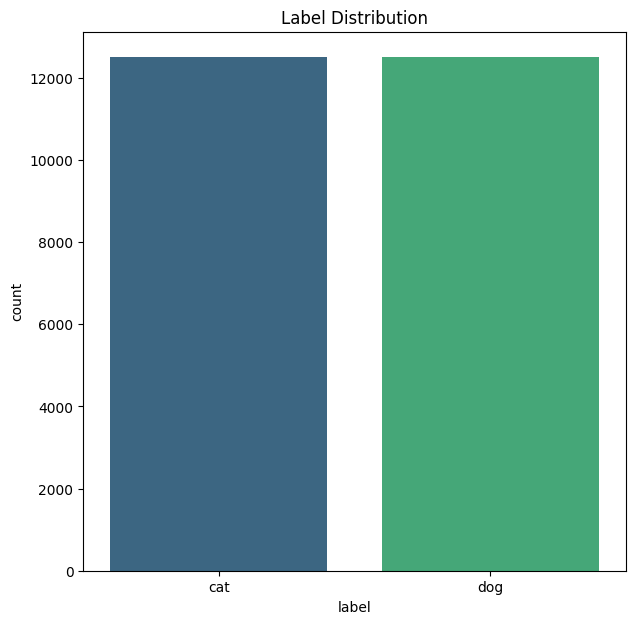

In [28]:
plt.figure(figsize = (7,7))
sns.countplot(x = df['label'], palette='viridis')
plt.title("Label Distribution")
plt.show()

In [29]:
cat = [file for file in file_names if file[:3] == 'cat']
dog = [file for file in file_names if file[:3] == 'dog']

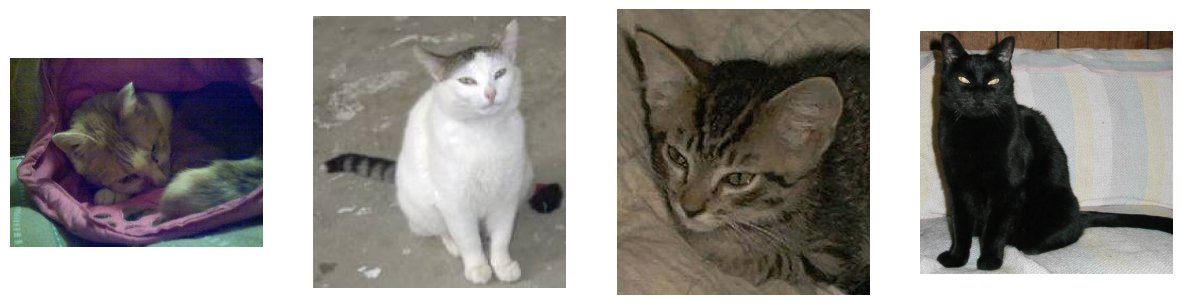

In [30]:
random_cats = random.sample(cat, 4)
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
for i, img_name in enumerate(random_cats):
    img = mpimg.imread(os.path.join(train_path, img_name))
    axes[i].imshow(img)
    axes[i].axis('off')

plt.show()

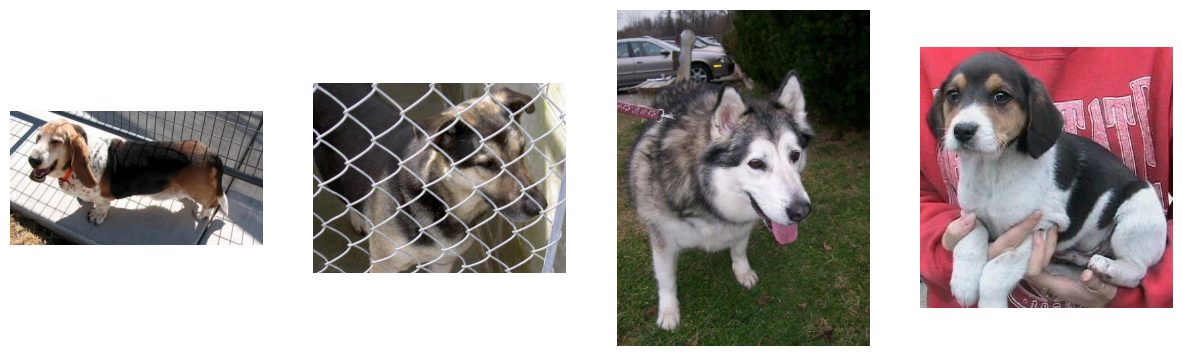

In [31]:
random_dogs = random.sample(dog, 4)
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
for i, img_name in enumerate(random_dogs):
    img = mpimg.imread(os.path.join(train_path, img_name))
    axes[i].imshow(img)
    axes[i].axis('off')

plt.show()


In [32]:
random.shuffle(file_names)
train_size = 0.8
total_files = len(file_names)
num_train = int(total_files*train_size)
train_dir = './train/'
test_dir  = './test1/'
train_images =[train_dir +i for i in file_names[:num_train]]
val_images = [train_dir +i for i in file_names[num_train:]]
test_images = [test_dir +i for i in file_names_test]

In [33]:
ROWS = 64
COLS = 64
CHANNELS = 3
def read_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_COLOR)
    if img is None:
        raise FileNotFoundError(f"Cannot open or read the image file: {file_path}")
    return cv2.resize(img, (COLS, ROWS), interpolation=cv2.INTER_CUBIC)

def prep_data(images):
    m = len(images)
    X = np.ndarray((m, ROWS, COLS, CHANNELS), dtype=np.uint8)
    y = np.zeros((m, 1))
    print("X.shape is {}".format(X.shape))

    for i, image_file in enumerate(images):
        image = read_image(image_file)
        X[i, :] = np.squeeze(image.reshape((ROWS, COLS, CHANNELS)))

        if 'dog' in image_file.lower():
            y[i, 0] = 1
        elif 'cat' in image_file.lower():
            y[i, 0] = 0
        else:  # for test data
            y[i, 0] = image_file.split('/')[-1].split('.')[0]

        if i % 5000 == 0:
            print("Proceed {} of {}".format(i, m))

    return X, y
X_train, y_train = prep_data(train_images)

X.shape is (20000, 64, 64, 3)
Proceed 0 of 20000
Proceed 5000 of 20000
Proceed 10000 of 20000
Proceed 15000 of 20000


In [34]:
X_test, y_test =prep_data(test_images)

X.shape is (12500, 64, 64, 3)
Proceed 0 of 12500
Proceed 5000 of 12500
Proceed 10000 of 12500


In [35]:
X_val, y_val = prep_data(val_images)

X.shape is (5000, 64, 64, 3)
Proceed 0 of 5000


In [36]:
y_train_one_hot = to_categorical(y_train)
y_val_one_hot = to_categorical(y_val)
num_classes = y_train_one_hot.shape[1]
X_train_norm = X_train / 255
X_val_norm = X_val / 255

In [37]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=(ROWS, COLS, CHANNELS), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, (1,1), activation='relu'))
#model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dropout(0.4))

model.add(Dense(units=120, activation='relu'))
model.add(Dense(units=2, activation='sigmoid'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 2, 2, 512)           │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120)                 │         245,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             242 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 766,122 (2.92 MB)

 Trainable params: 766,122 (2.92 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train_norm, y_train_one_hot, validation_data=(X_val_norm, y_val_one_hot), epochs=50, batch_size = 64)

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 217s 674ms/step - accuracy: 0.5313 - loss: 0.6913 - val_accuracy: 0.6730 - val_loss: 0.6234
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 252s 643ms/step - accuracy: 0.6627 - loss: 0.6141 - val_accuracy: 0.7734 - val_loss: 0.4946
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 221s 703ms/step - accuracy: 0.7492 - loss: 0.5188 - val_accuracy: 0.7978 - val_loss: 0.4466
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 201s 643ms/step - accuracy: 0.7839 - loss: 0.4598 - val_accuracy: 0.8102 - val_loss: 0.4138
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 207s 658ms/step - accuracy: 0.8053 - loss: 0.4250 - val_accuracy: 0.8382 - val_loss: 0.3616
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 259s 649ms/step - accuracy: 0.8259 - loss: 0.3910 - val_accuracy: 0.8442 - val_loss: 0.3470
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 205s 657ms/step - accuracy: 0.8325 - loss: 0.3771 - val_accuracy: 0.8568 - val_loss: 0.3305
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 202s 645ms/step - accuracy: 0.8449 -

In [ ]:
image = X_test[20]
predictions = model.predict(image.reshape(1, 64, 64, 3))
predicted_class = np.argmax(predictions, axis=1)
plt.figure(figsize=(4, 2))
plt.imshow(image)
plt.title(f"Predicted class: {predicted_class[0]}")
plt.show()